# Brownian Motion

In [4]:
import matplotlib.pyplot as plt
mystyle = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(mystyle)
plt.rcParams["figure.figsize"] = (12, 6)

The aleatory package provides a class Brownian motion that allows us to quickly plot some paths generated by this process.

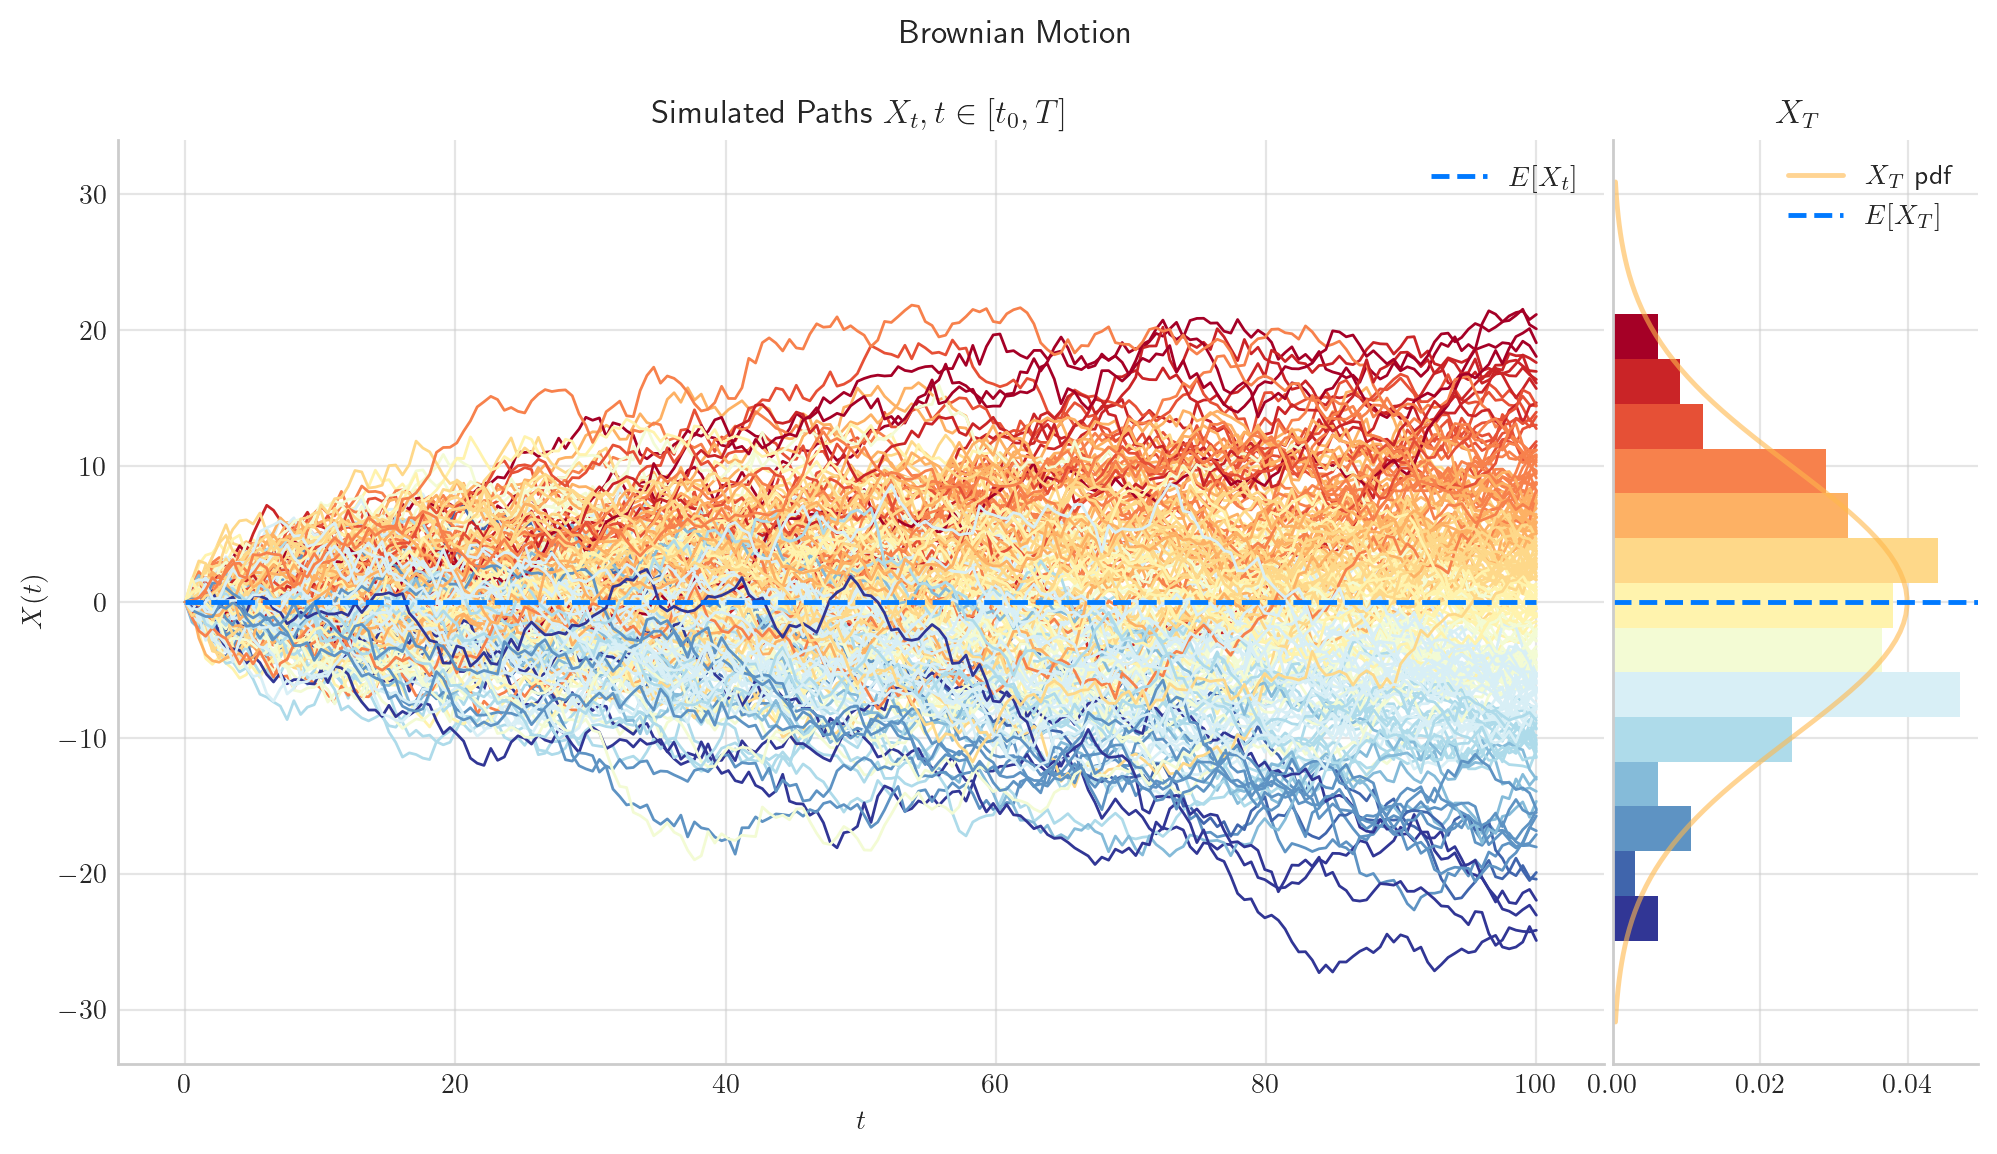

In [5]:
from aleatory.processes import BrownianMotion
process = BrownianMotion(T=100)
process.draw(n=200, N=200)
plt.show()

## Definition

A standard Brownian motion or Wiener process is a stochastic process $W =\{W_t, t\geq 0\},$ characterised by the following four properties:
1. $W_0 = 0$
2. $W_t-W_s \sim N(0, t-s),$ for any $0\leq s \leq t$
3. $W$ has independent increments
4. $W$ is almost surely continuous.

## Expectation, Variance and Covaraiance

Using points (1) and (2) above, we can coclude that 
\begin{equation}
W_t \sim \mathcal{N}(0,t), \qquad \forall\ t>0,
\end{equation}
i.e. $W_t$ is normally distributed with expectation zero and variance $t$.

This can also be expressed as
\begin{equation}
\mathbb{E}[W_t] = 0, \qquad \forall\ t>0,
\end{equation}
and
\begin{equation}
Var(W_t) = t, \qquad \forall\ t>0.
\end{equation}

We can calculate the covariance between two Wiener processes, $W_t$ and $W_s$, where $t > s > 0$ as follows:
\begin{align*}
Cov [W_t, W_s] &= \mathbb{E} [W_t W_s]  \\
												&= \mathbb{E} [(W_t-W_s)W_s +  W_s^2]  \\  
                        &= \mathbb{E} [(W_t-W_s)]\mathbb{E}[W_s] +  \mathbb{E}[W_s^2]  \\
                        &= s.
\end{align*}
To move from the 2nd to 3rd line, we used the independence of increments (property (3)), which allows us to treat the expectation of the product of two increments separately, i.e., the independence of increments implies \(W_t - W_s\) is independent of \(W_s\). Hence, we can split the expectation,
\begin{equation}
\mathbb{E}[(W_t - W_s)W_s] = \mathbb{E}[W_t - W_s]\mathbb{E}[W_s].
\end{equation}

To include the case $s > t > 0$ in a single expression, we can write 
\begin{equation}
Cov[W_t, W_s] = \textrm{min}(s, t) \qquad \forall\ s, t > 0.
\end{equation}

Expressing this in matrix form, we have
\begin{equation}
\Sigma = \begin{pmatrix}
	1 & \textrm{min}(s, t) \\
	\textrm{min}(s, t) & 1 \\
\end{pmatrix}.
\end{equation}

# Marginal Distributions in Python

Since
\begin{equation}
W_1 \sim \mathcal{N}(0,1), \qquad \forall\ t>0,
\end{equation}
we can generate a value for $W_1$ using a standard normal distribution.

In [13]:
import numpy as np
from scipy.stats import norm
W_1 = norm(loc=0, scale=np.sqrt(1))
W_1, type(W_1)

(<scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fe296667340>,
 scipy.stats._distn_infrastructure.rv_continuous_frozen)

Using the `aleatory` package, we can create an instance of the `BrownianMotion` class, and call `get_marginal` on it.

In [12]:
from aleatory.processes import BrownianMotion
process = BrownianMotion()
W_1 = process.get_marginal(t=1) 
W_1, type(W_1)

(<scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fe296643190>,
 scipy.stats._distn_infrastructure.rv_continuous_frozen)

## Probability Density Function of the Marginal Distribution

The probability density function of $W_t$ is given by,
\begin{equation*}
f(x, t) = \dfrac{1}{\sqrt{2 \pi t}}\exp\left\{ -\dfrac{x^2}{2t}\right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

In statistical mechanics, the Fokker–Planck equation is a partial differential equation that describes the time evolution of the probability density function of the velocity of a particle under the influence of drag forces and random forces, as in Brownian motion.
\begin{equation}
\dfrac{\partial}{\partial t}f(x,t)= \dfrac{1}{2}\dfrac{\partial}{\partial x^2}f(x,t).
\end{equation}

W_1 = process.get_marginal(t=1)
We can visualise the pdf of $W_1$ using `W_1.pdf(x)` where $x$ is a numpy linspace (techincally of type `NDArray[floatin[Any]]`).


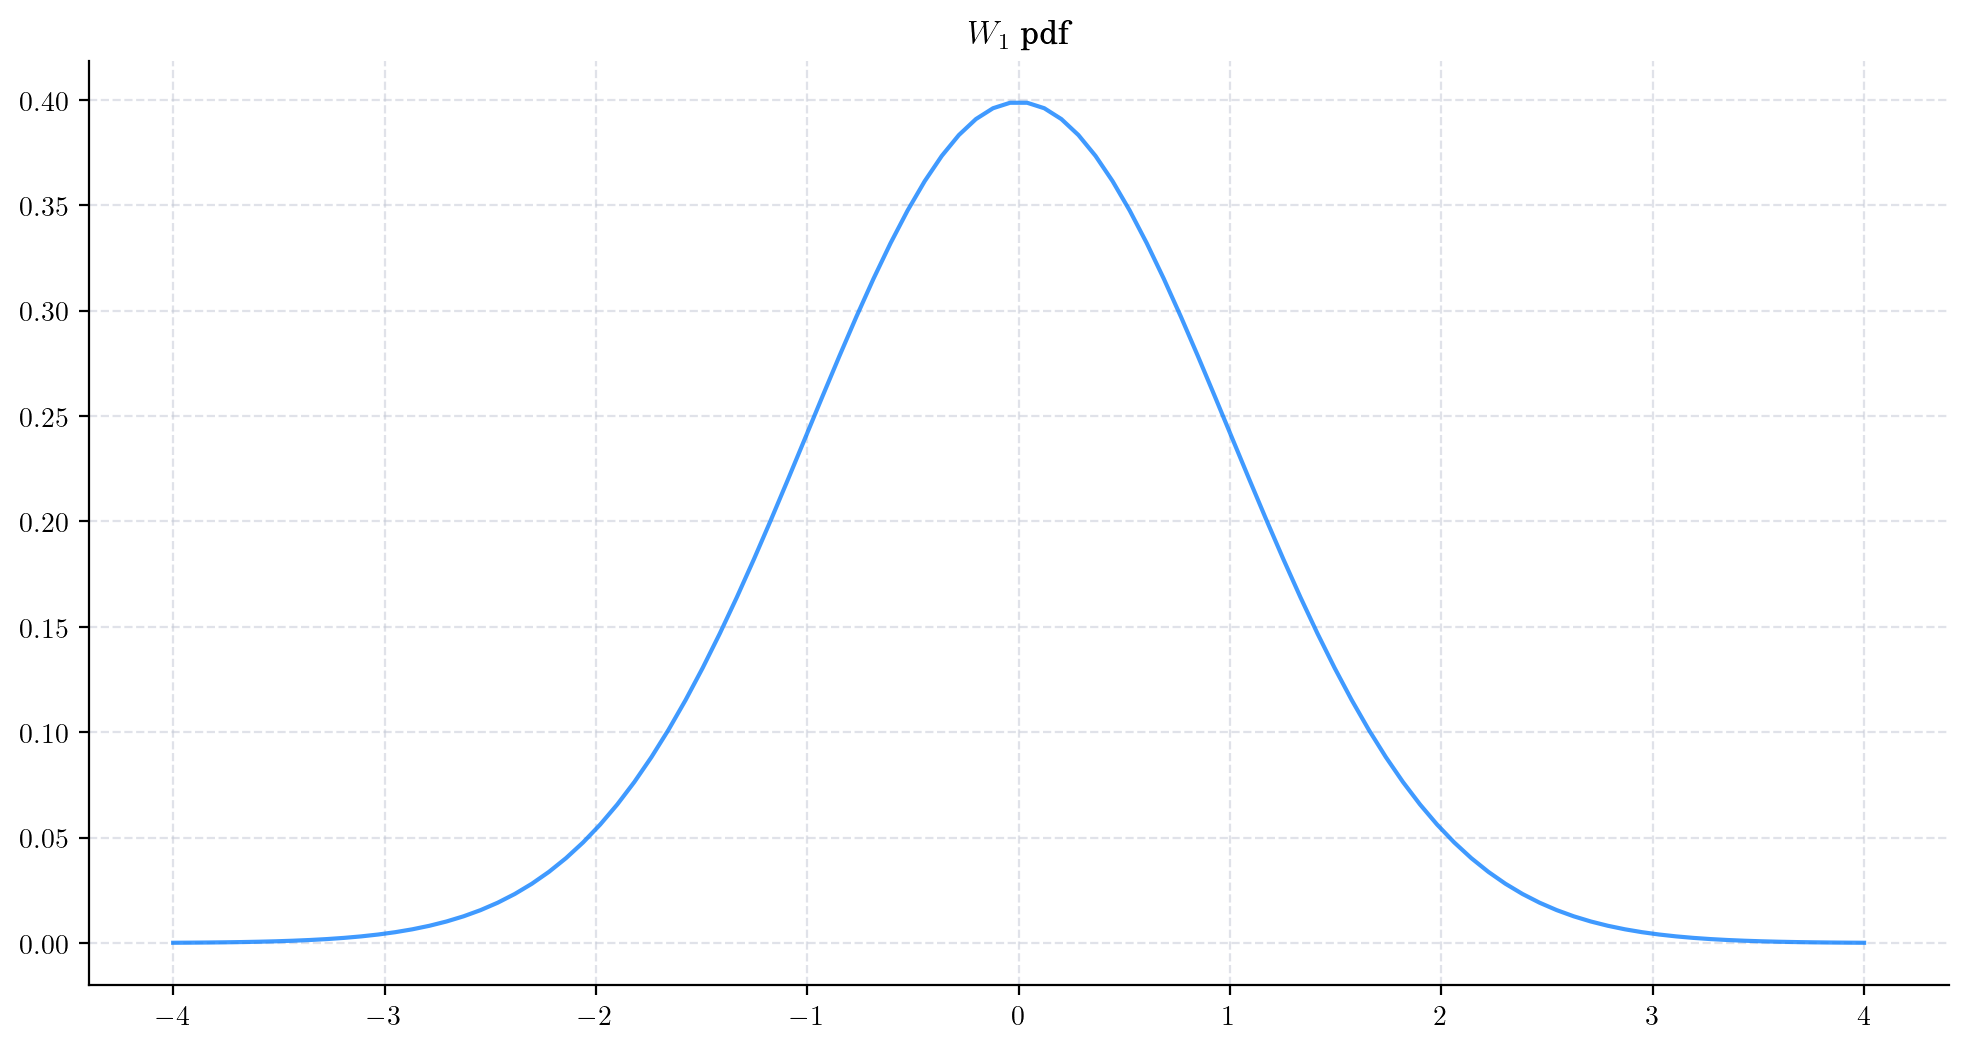

In [9]:
# import plt
from aleatory.processes import BrownianMotion

process = BrownianMotion()
W_1 = process.get_marginal(t=1)
x = np.linspace(-4, 4, 100)
plt.plot(x, W_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$W_1$ pdf')
plt.show()

Plotting the pdf for multiple values of $t$ lets us visualise the diffusion of the marginal distribution, $W_t$.

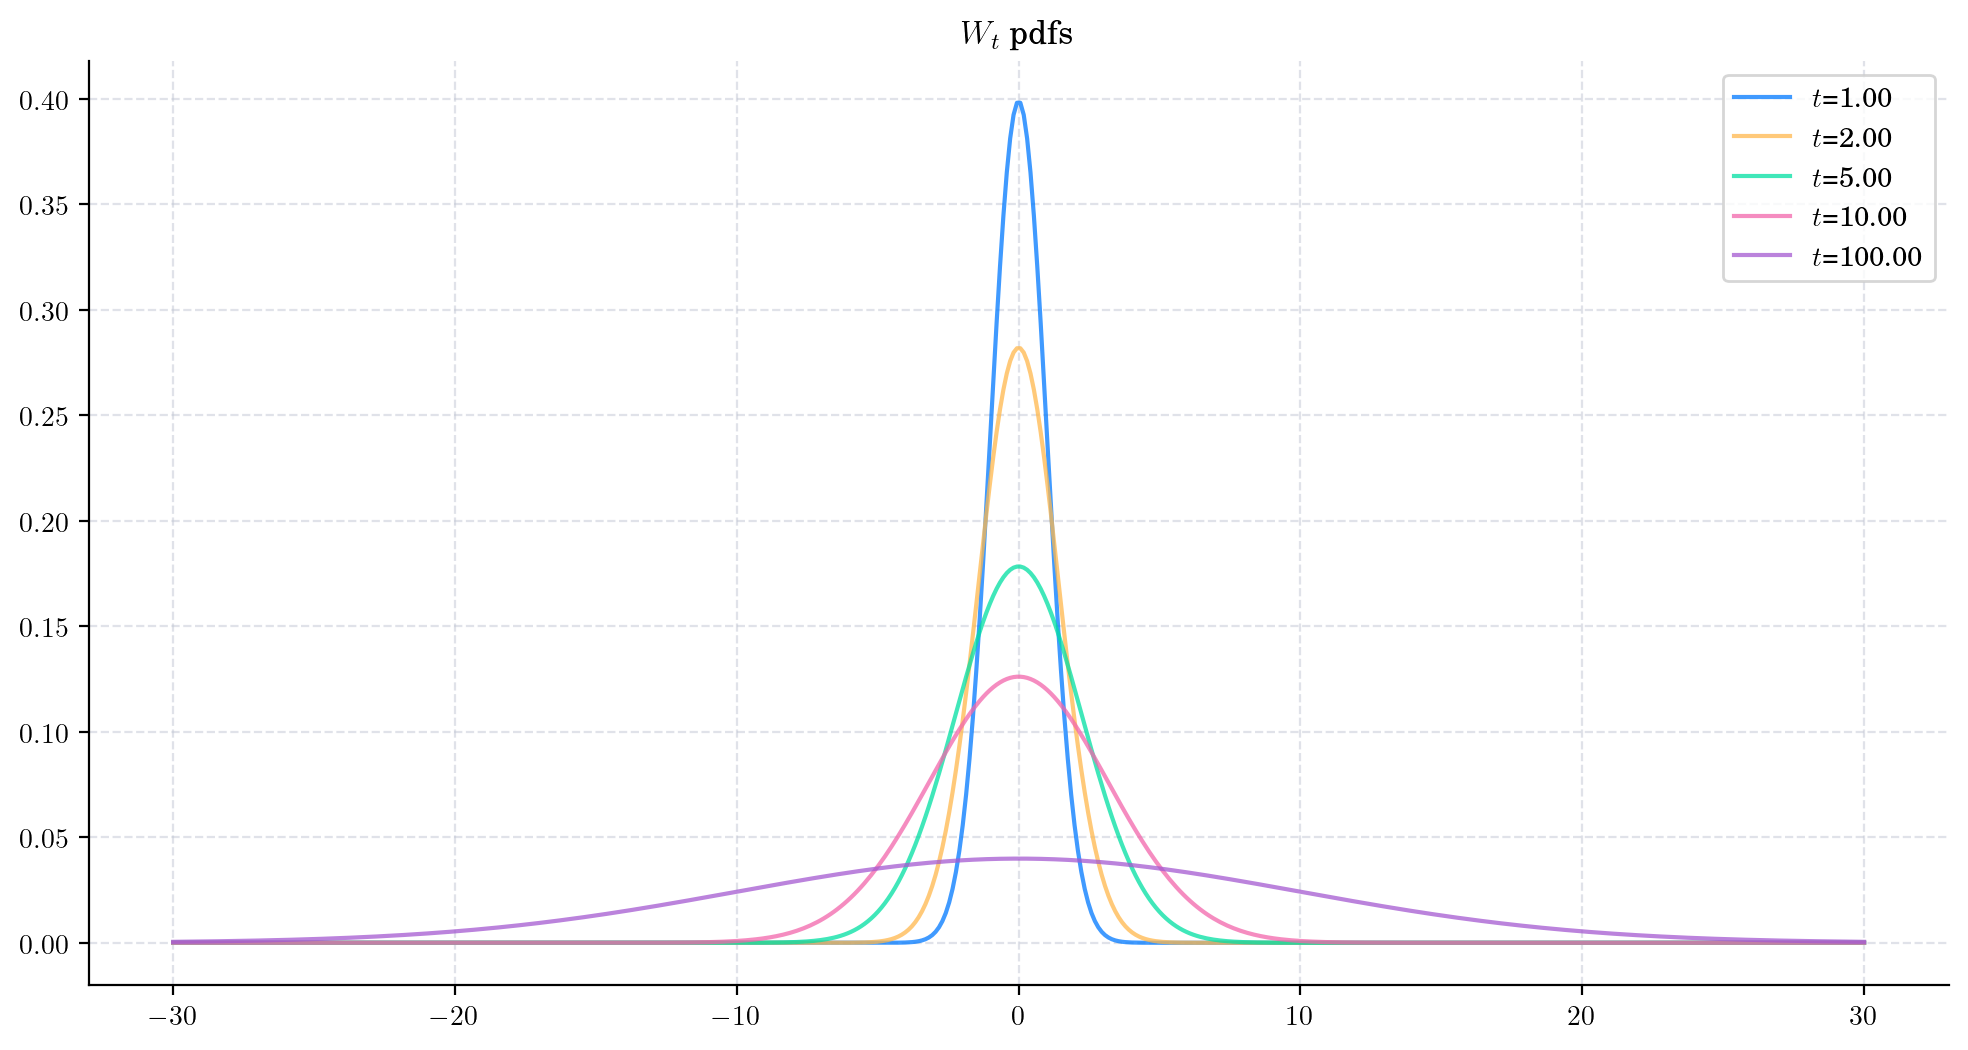

In [10]:
fig, ax1 = plt.subplots(1, 1)
for t in [1, 2, 5, 10, 100]:
    W_t = process.get_marginal(t)
    x = np.linspace(-30, 30, 500)
    ax1.plot(x, W_t.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={t:.2f}')
ax1.legend()
plt.title('$W_t$ pdfs')
plt.show()

## Sampling the Marginal Distribution

To get 5 samples from the distribution $W_1 \sim \mathcal{N}(0,1)$:

In [11]:
from aleatory.processes import BrownianMotion
process = BrownianMotion()
W_1 = process.get_marginal(t=1.0)
W_1.rvs(size=5)

array([ 0.54786175, -0.74282136, -0.40237553, -1.14341254,  0.57929363])

# Simulating a Stochastic Process

In order to simulate paths from a stochastic process, we first need to define a discrete partition for the simulation to take place. We consider an equidistant partition of size $n$ over the interval $[0, T]$, thus
\begin{equation*}
t_i = \frac{i}{n-1} T \qquad  \hbox{for } i = 0, \cdots, n-1.
\end{equation*}

To simulate a path, we will make use of the fact that
\begin{align*}
W_0 &= 0 \\
W_{t_1} = (W_{t_1} - W_0)  + W_0 & \sim N\left(0,\frac{T}{n-1}\right) \\
W_{t_2} = (W_{t_2} - W_{t_1}) + W_{t_1} &  \sim N\left(0,\frac{T}{n-1}\right) + W_{t_1}    \\ 
W_{t_3} = (W_{t_3} - W_{t_2}) + W_{t_2}  & \sim N\left(0,\frac{T}{n-1}\right) + W_{t_2}    \\ 
 & \cdots & \\
 W_{t_{n-1}} = (W_{t_{n-1}} - W_{t_{n-2}}) + W_{t_{n-2}}& \sim N\left(0,\frac{T}{n-1}\right) + W_{t_{n-2}},
\end{align*}
i.e. a path can be constructed by the cumulative sum of samples from the normal distribution, $\mathcal{N}(0,\frac{T}{n-1})$.

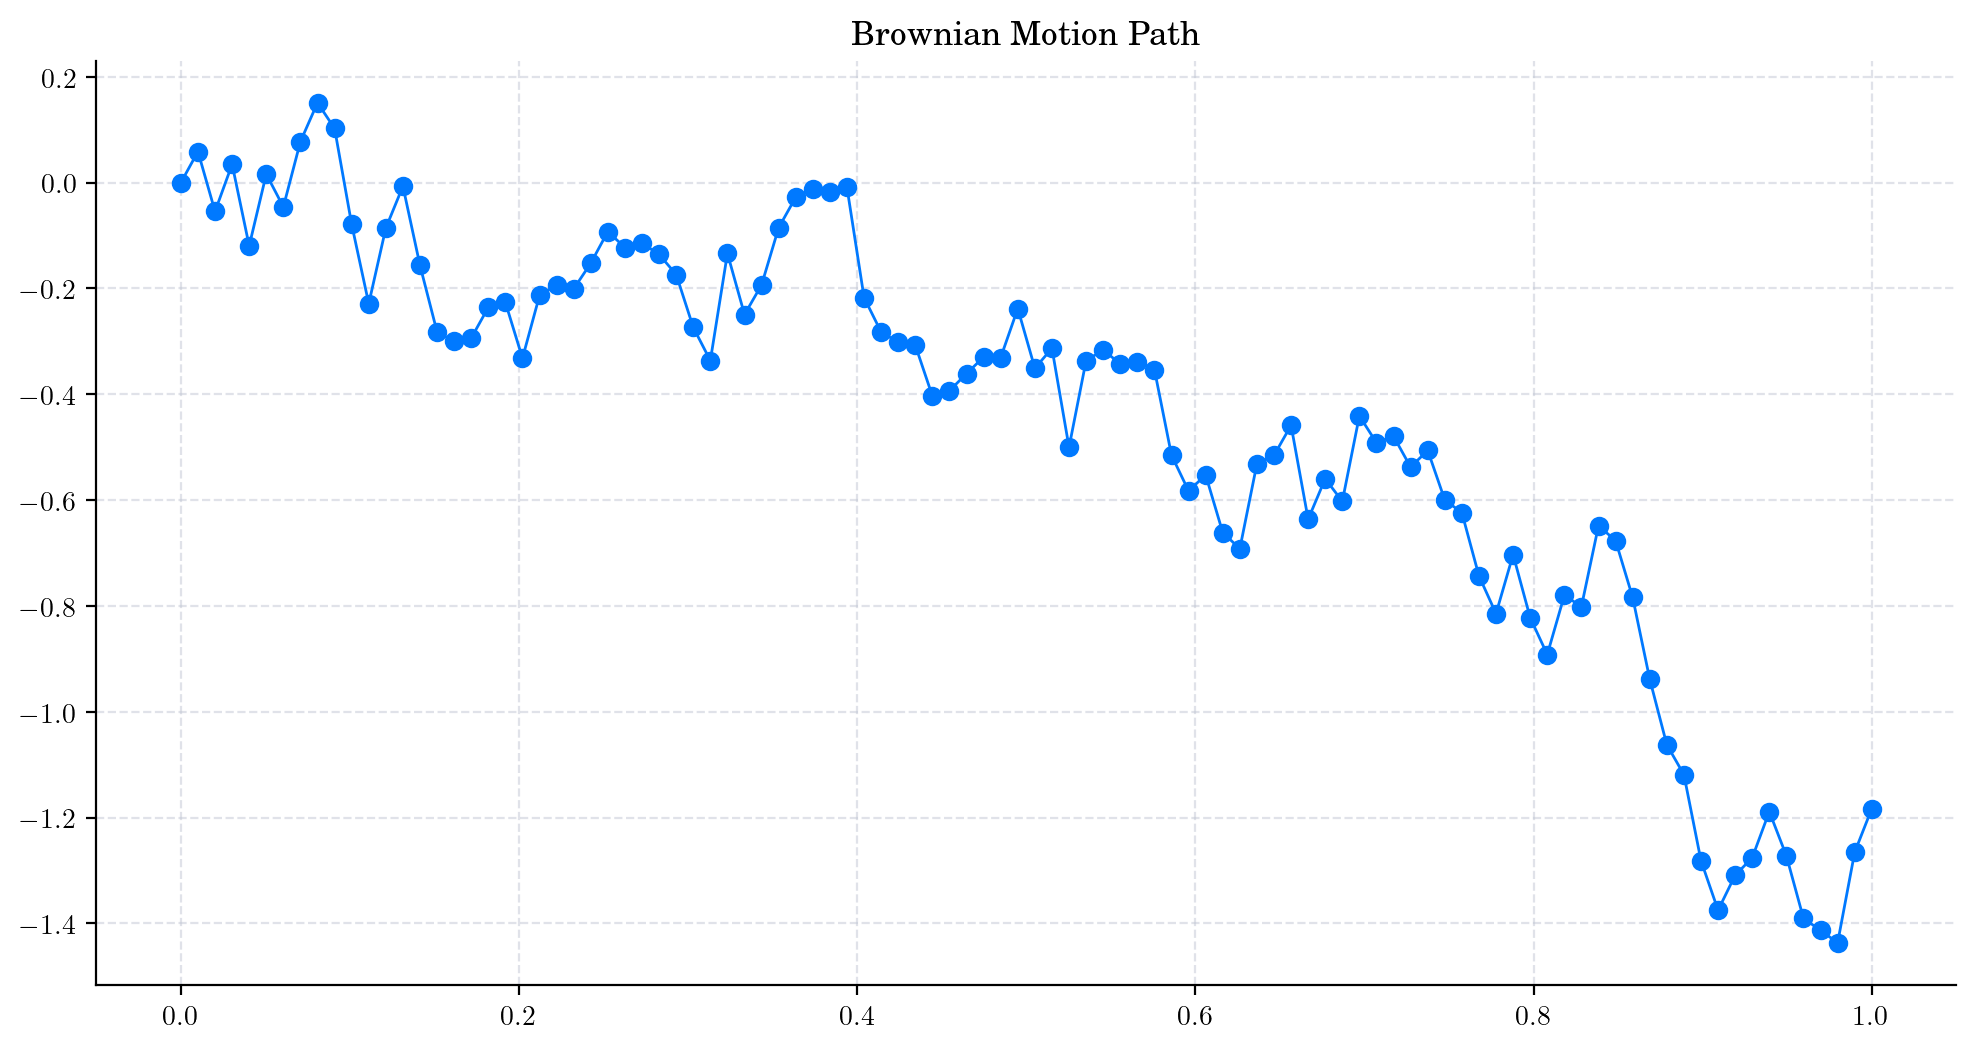

In [15]:
import numpy as np
from scipy.stats import norm

T = 1.0 
n = 100 
times = np.linspace(0, T, n)  
sigma = np.sqrt(T/(n-1))  

normal_increments = norm.rvs(loc=0, scale=sigma, size=n-1) # Sample of size n-1
normal_increments = np.insert(normal_increments, 0, 0) # The initial point
Wt = normal_increments.cumsum() # Taking the cumulative sum

plt.plot(times, Wt, 'o-', lw=1)
plt.title('Brownian Motion Path')
plt.show()

To simulate several such paths, we can use the `plot` and `draw` methods from the `aleatory` library.

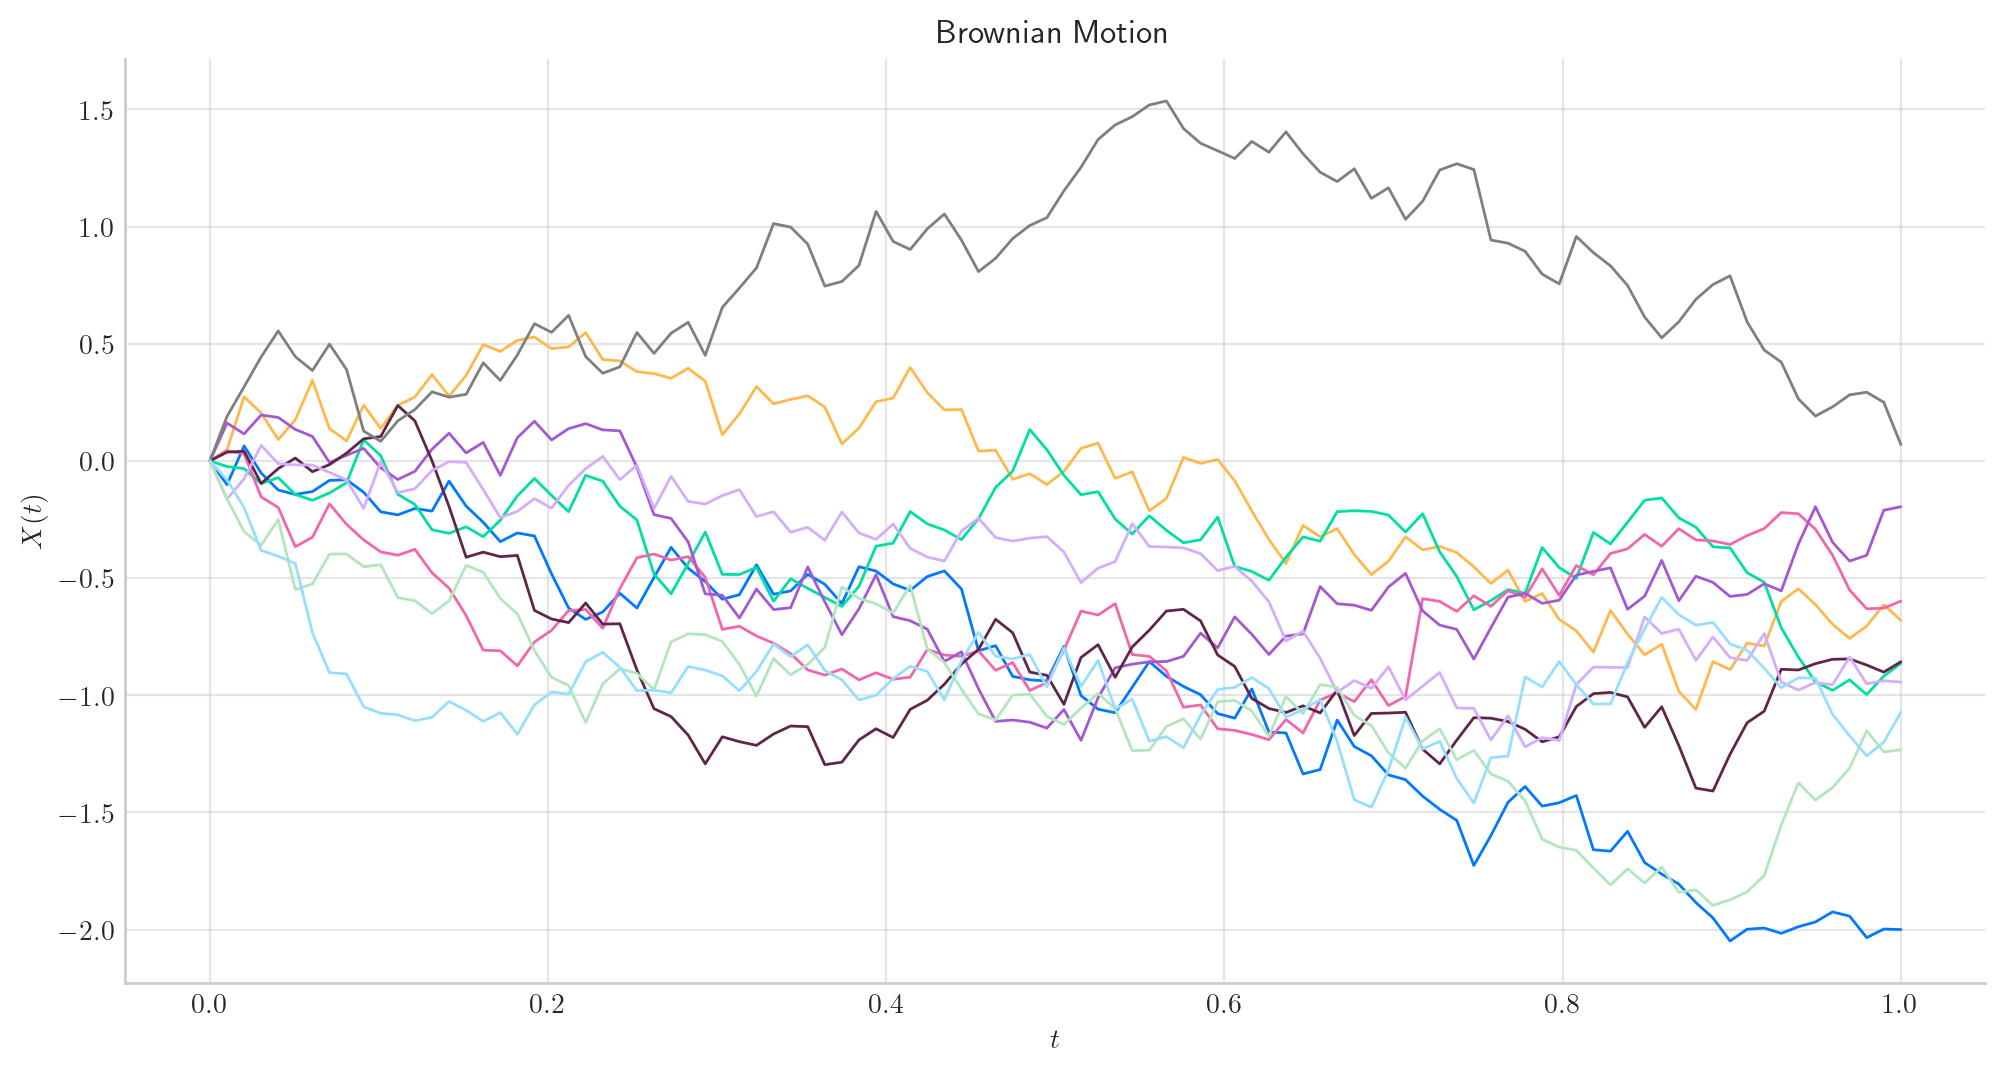

In [17]:
from aleatory.processes import BrownianMotion

process = BrownianMotion(T=1)
process.plot(n=100, N=10)
plt.show()

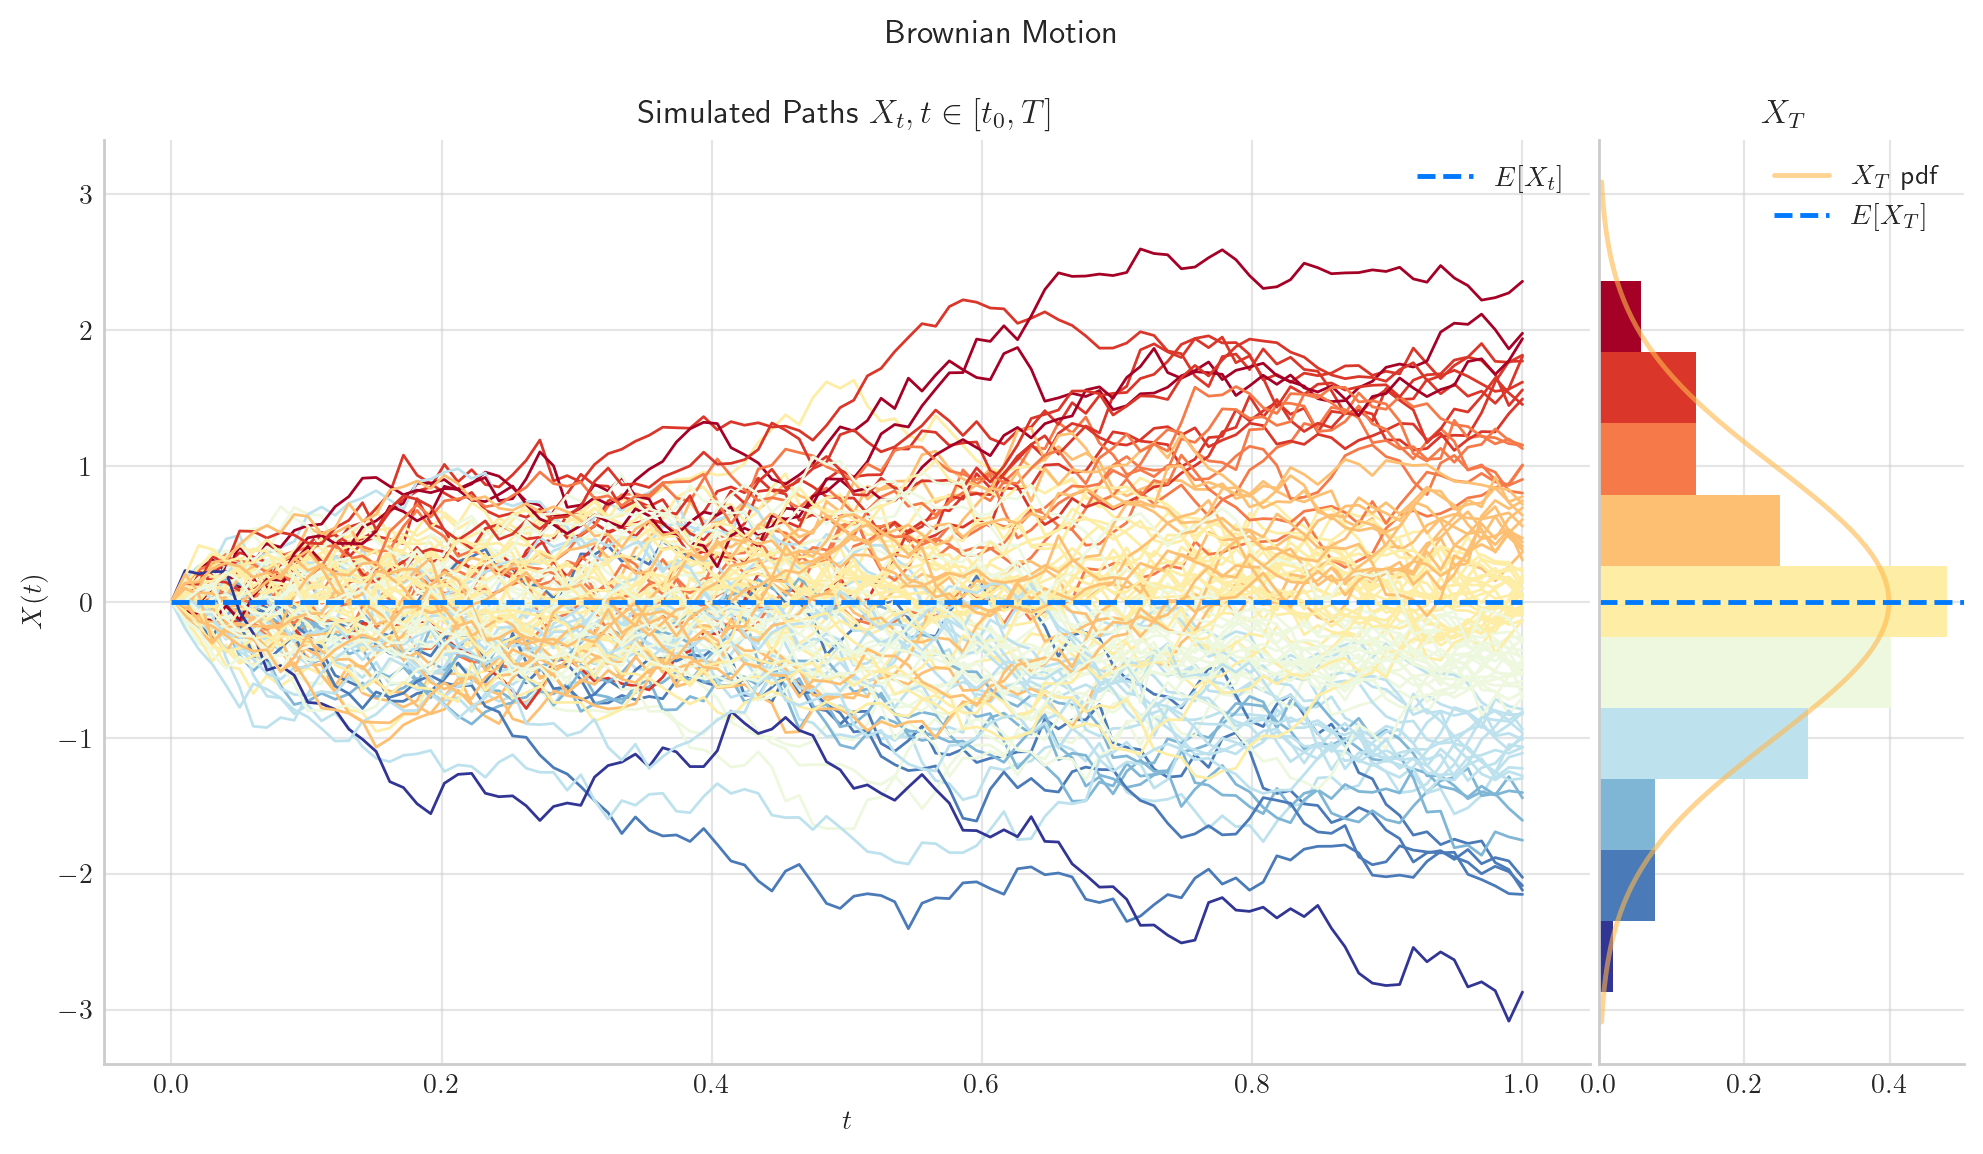

In [18]:
process.draw(n=100, N=100)
plt.show()

Num simulations: 100
0.09 1.7999999999999998
Num simulations: 1000
0.141 2.82
Num simulations: 10000


0.1376 2.752
Num simulations: 100000
0.14325 2.8649999999999998
Num simulations: 1000000
0.142912 2.8582400000000003


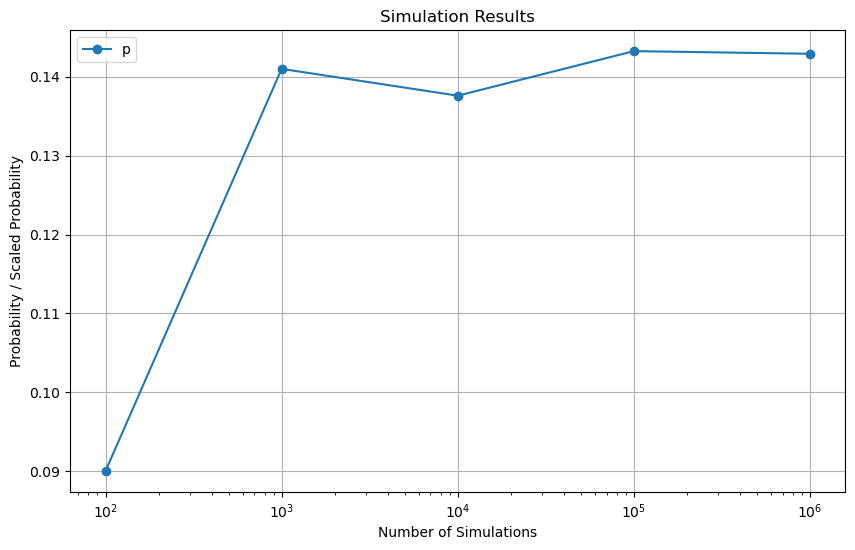

In [27]:
import numpy as np
import concurrent.futures
import matplotlib.pyplot as plt

def throw_dice():
	# Calculate the outcome score of throwing 2 fair 6-sided dice
	return np.random.randint(1, 7) + np.random.randint(1, 7)

def simulate_one_round(_):
    position = 0
    while True:
        position += throw_dice()
        if position == 440:
            return 1  # Success
        elif position > 440:
            return 0  # Fail

def simulate(num_simulations):
    print("Num simulations:", num_simulations)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(simulate_one_round, range(num_simulations)))
    return sum(results)  # Sum of successes

simulation_set = [100, 1_000, 10_000, 100_000, 1_000_000]
p_results = []  # Store p results
p_times_20_results = []  # Store 20p results

for num_simulations in simulation_set:
    num_successes = simulate(num_simulations)
    p = num_successes / num_simulations
    p_times_20 = 20 * p
    p_results.append(p)
    p_times_20_results.append(p_times_20)
    print(p, p_times_20)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(simulation_set, p_results, label='p', marker='o')
plt.xscale('log')  # Since simulation_set varies greatly, a log scale might be more appropriate
plt.xlabel('Number of Simulations')
plt.ylabel('Probability / Scaled Probability')
plt.title('Simulation Results')
plt.legend()
plt.grid(True)
plt.show()